In [45]:
import keras
from keras import layers, losses, optimizers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Loading and normalizing the Dataset

In [3]:
(x_train, ytrain), (x_test, ytest) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train, x_test = x_train.reshape(-1,784), x_test.reshape(-1,784)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [83]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)      # Bottleneck

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_model = keras.Model(inputs=input, outputs=decoded)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder_model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_48 (Dense)             (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = autoencoder_model.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 4s 16ms/step - loss: 0.3246 - val_loss: 0.1508
Epoch 2/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1418 - val_loss: 0.1202
Epoch 3/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1185 - val_loss: 0.1093
Epoch 4/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1093 - val_loss: 0.1034
Epoch 5/25
235/235 [==============================] - 4s 15ms/step - loss: 0.1037 - val_loss: 0.0990
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0994 - val_loss: 0.0975
Epoch 7/25
235/235 [==============================] - 4s 16ms/step - loss: 0.0972 - val_loss: 0.0942
Epoch 8/25
235/235 [==============================] - 4s 16ms/step - loss: 0.0952 - val_loss: 0.0930
Epoch 9/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0937 - val_loss: 0.0920
Epoch 10/25
235/235 [==============================] - 4s 15ms/step - loss: 0.0927 - val_lo

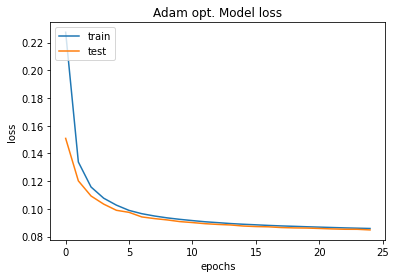

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Adam opt. Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
# plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
encoder_model = keras.Model(input, encoded)

encoded_images_train = encoder_model.predict(x_train)
reconstructed_images_train = autoencoder_model.predict(x_train)

encoded_images_test = encoder_model.predict(x_test)
reconstructed_images_test = autoencoder_model.predict(x_test)

Train Images
  - Original
  - Compressed
  - Reconstructed

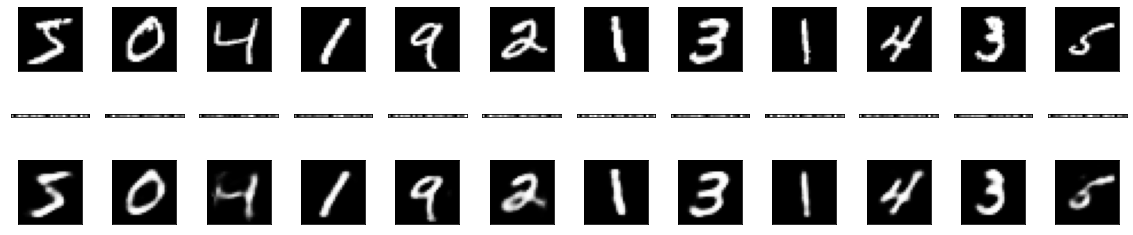

In [41]:
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # encoded / compressed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images_train[i].reshape(1,32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructed_images_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Test Images
  - Original
  - Compressed
  - Reconstructed

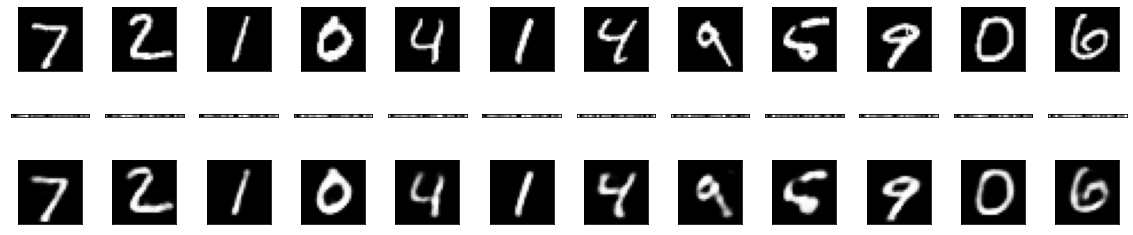

In [42]:
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # encoded / compressed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_images_test[i].reshape(1,32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructed_images_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## **Experimenting with different optimizers**

1. RMSProp

In [81]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)      # Bottleneck

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_model_rms = keras.Model(inputs=input, outputs=decoded)
autoencoder_model_rms.compile(optimizer='RMSprop', loss='binary_crossentropy')

history_rms = autoencoder_model_rms.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 4s 17ms/step - loss: 0.2748 - val_loss: 0.1587
Epoch 2/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1526 - val_loss: 0.1336
Epoch 3/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1326 - val_loss: 0.1231
Epoch 4/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1219 - val_loss: 0.1152
Epoch 5/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1156 - val_loss: 0.1110
Epoch 6/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1117 - val_loss: 0.1131
Epoch 7/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1082 - val_loss: 0.1034
Epoch 8/25
235/235 [==============================] - 4s 17ms/step - loss: 0.1055 - val_loss: 0.1035
Epoch 9/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1031 - val_loss: 0.1022
Epoch 10/25
235/235 [==============================] - 4s 16ms/step - loss: 0.1015 - val_lo

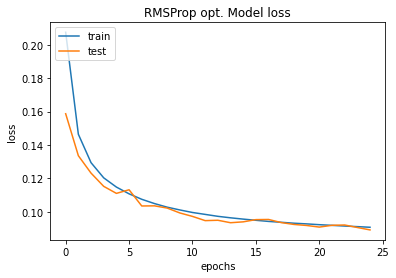

In [82]:
plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('RMSProp opt. Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
# plt.ylim(0.05,0.1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2. SGD with momentum

In [76]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)      # Bottleneck

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_model_SGDm = keras.Model(inputs=input, outputs=decoded)

opt = optimizers.SGD(momentum = 0.9)

autoencoder_model_SGDm.compile(optimizer=opt, loss='binary_crossentropy')

history_SGDm = autoencoder_model_SGDm.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2255 - val_loss: 0.2223
Epoch 2/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2231 - val_loss: 0.2197
Epoch 3/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2209 - val_loss: 0.2173
Epoch 4/25
235/235 [==============================] - 3s 15ms/step - loss: 0.2185 - val_loss: 0.2151
Epoch 5/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2161 - val_loss: 0.2128
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2138 - val_loss: 0.2106
Epoch 7/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2114 - val_loss: 0.2084
Epoch 8/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2093 - val_loss: 0.2063
Epoch 9/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2076 - val_loss: 0.2043
Epoch 10/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2052 - val_lo

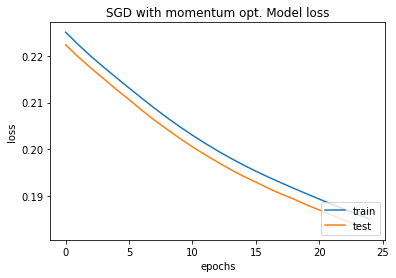

In [77]:
plt.plot(history_SGDm.history['loss'])
plt.plot(history_SGDm.history['val_loss'])
plt.title('SGD with momentum opt. Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
# plt.ylim(0.082,0.086)
plt.legend(['train', 'test'], loc='lower right')
plt.show()

3. SGD without momentum

In [78]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(32, activation='relu')(encoded)      # Bottleneck

decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_model_SGD = keras.Model(inputs=input, outputs=decoded)

opt = optimizers.SGD()

autoencoder_model_SGD.compile(optimizer=opt, loss='binary_crossentropy')

history_SGD = autoencoder_model_SGD.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 4s 17ms/step - loss: 0.6889 - val_loss: 0.6535
Epoch 2/25
235/235 [==============================] - 4s 15ms/step - loss: 0.5487 - val_loss: 0.2811
Epoch 3/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2785 - val_loss: 0.2724
Epoch 4/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2721 - val_loss: 0.2697
Epoch 5/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2694 - val_loss: 0.2678
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2678 - val_loss: 0.2662
Epoch 7/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2664 - val_loss: 0.2647
Epoch 8/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2645 - val_loss: 0.2631
Epoch 9/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2630 - val_loss: 0.2613
Epoch 10/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2611 - val_lo

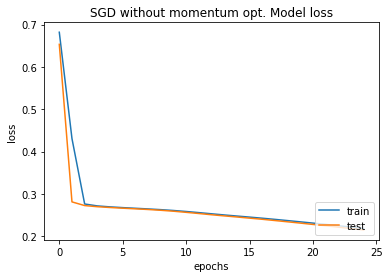

In [80]:
plt.plot(history_SGD.history['loss'])
plt.plot(history_SGD.history['val_loss'])
plt.title('SGD without momentum opt. Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
# plt.ylim(0.083,0.085)
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## **Test Reconstruction Loss vs hidden neurons**
(For the best model, i.e. with Adam optimizer)

In [95]:
def get_reconstruction_loss_for_k_neurons(k):
  input = keras.Input(shape=(784,))
  encoded = layers.Dense(128, activation='relu')(input)
  encoded = layers.Dense(k, activation='relu')(encoded)      # Bottleneck

  decoded = layers.Dense(128, activation='relu')(encoded)
  decoded = layers.Dense(784, activation='sigmoid')(decoded)

  autoencoder_model = keras.Model(inputs=input, outputs=decoded)
  autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
  history = autoencoder_model.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
  del input, encoded, decoded, autoencoder_model
  return history.history['val_loss'][-1]

In [96]:
hidden_neurons = [2,5,10,20,30,50,100]
reconstruction_losses = []
for k in hidden_neurons:
  reconstruction_losses.append(get_reconstruction_loss_for_k_neurons(k))

reconstruction_losses

Epoch 1/25
235/235 [==============================] - 4s 16ms/step - loss: 0.3687 - val_loss: 0.2417
Epoch 2/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2390 - val_loss: 0.2290
Epoch 3/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2282 - val_loss: 0.2222
Epoch 4/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2220 - val_loss: 0.2175
Epoch 5/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2177 - val_loss: 0.2138
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2132 - val_loss: 0.2105
Epoch 7/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2102 - val_loss: 0.2082
Epoch 8/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2077 - val_loss: 0.2064
Epoch 9/25
235/235 [==============================] - 4s 15ms/step - loss: 0.2062 - val_loss: 0.2055
Epoch 10/25
235/235 [==============================] - 4s 16ms/step - loss: 0.2051 - val_lo

[0.19537241756916046,
 0.14669255912303925,
 0.117031991481781,
 0.09920242428779602,
 0.08559355139732361,
 0.07771613448858261,
 0.0731949657201767]

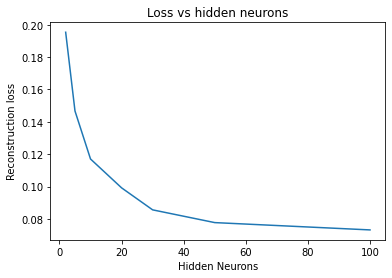

In [98]:
plt.plot(hidden_neurons, reconstruction_losses)
# plt.plot(history_SGD.history['val_loss'])
plt.title('Loss vs hidden neurons')
plt.ylabel('Reconstruction loss')
plt.xlabel('Hidden Neurons')
# plt.ylim(0.083,0.085)
# plt.legend(['train', 'test'], loc='lower right')
plt.show()

## **PCA Reconstruction vs Autoencoder**

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(x_train)

X_sc_train = scaler.transform(x_train)
X_sc_test = scaler.transform(x_test)

In [107]:
pca = PCA(n_components=200)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)

inv_pca = pca.inverse_transform(X_pca_test)

inv_pca.shape, reconstructed_images_test.shape

((10000, 784), (10000, 784))

Test Images
  - Original
  - Reconstructed with PCA
  - Reconstructed with autoencoder

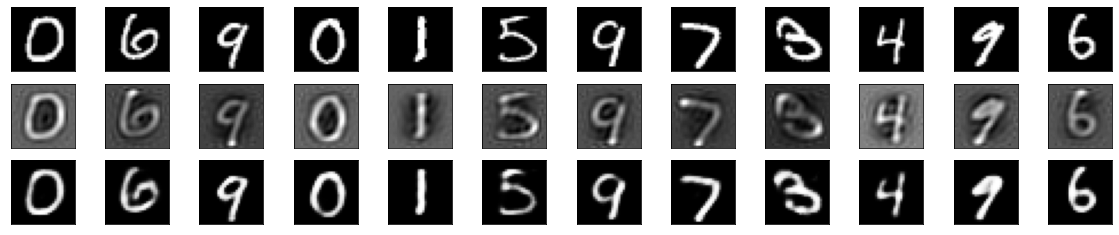

In [109]:
n = 12
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # encoded / compressed
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(inv_pca[i+10].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructed_images_test[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Reconstruction Loss

In [117]:
rec_loss_pca = np.mean(np.abs(inv_pca - x_test))
rec_loss_autoencoder = np.mean(np.abs(reconstructed_images_test - x_test))

print("Reconstruction Losses for PCA and Autoencoder = ",rec_loss_pca,",", rec_loss_autoencoder, "respectively")

Reconstruction Losses for PCA and Autoencoder =  0.3442718 , 0.028942911 respectively
